# US Election 2020 Forecasting Using Polling Data for Simulations

In [82]:
# Importing Libraries and Dataset

url = 'https://github.com/rajeevratan84/datascienceforbusiness/blob/master/president_polls.csv?raw=true'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from numpy.random import normal

In [4]:
# Dataset
df = pd.read_csv(url)
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
11905,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
11906,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
11907,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


**List all the Columns**

In [5]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

There's a lot of information, let's weed out the necessary ones

In [6]:
df = df[['question_id','poll_id','state','pollster','start_date','end_date','answer','pct']]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0
...,...,...,...,...,...,...,...,...
11904,92081,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,46.0
11905,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Warren,43.0
11906,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,49.0
11907,92078,57025,NaN,Rasmussen Reports/Pulse Opinion Research,11/12/18,11/13/18,Obama,50.0


In [7]:
# How many polsters are we working with?
print(len(df.pollster.unique()))

196


In [8]:
df.start_date.unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

In [9]:
# Let's see if our data types are alright
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [10]:
# Start Date and End Date are Objects, convert them to DateTime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


/tmp/ipykernel_61232/723090759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['start_date'])
/tmp/ipykernel_61232/723090759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_date'] = pd.to_datetime(df['end_date'])


In [11]:
# Sanity Check, let's make sure nothing is messed up in the dataset
df.head(10)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4
6,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Biden,48.1
7,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Trump,45.8
8,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Jorgensen,3.0
9,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Hawkins,0.9


# Cleaning and Exploring our Data

In [12]:
# Let's clean our Data.
# Let get all the polls that start or end between August 1st and November 2nd. This gives us 3 months leading up towards the November 2nd Election Date.

start_date = '2020-08-01'
end_date = '2020-11-02'

mask = (df['start_date'] >= start_date) & (df['end_date'] <= end_date)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [13]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


In [14]:
# We have third party candidates, er should get a list of them
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [15]:
# Let's limit to Trump and Biden

candidates = ['Trump','Biden']
df = df.loc[df['answer'].isin(candidates)]

df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [16]:
# Check on data to make sure things are okay
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


In [17]:
# Notice that each poll occupies two rows
df.loc[df['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0


In [18]:
# Also, national polls are labeled NaN, let's remove those.
df = df[df['state'].notna()]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5272,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
5273,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0
5274,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0
5275,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Biden,47.0


In [19]:
print(len(df.poll_id.unique()))

1062


# Changing our Data Layout

In [20]:
# Start our index from 1 instead of 0
df.index = np.arange(1, len(df)+1)
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
3198,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0
3200,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0
3201,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Biden,47.0


In [21]:
# Create a join index prefix for the new columns from the row below
df['join_index'] = df.index + 1
df['join_index']

/tmp/ipykernel_61232/456317510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['join_index'] = df.index + 1


1          2
2          3
3          4
4          5
5          6
        ... 
3198    3199
3199    3200
3200    3201
3201    3202
3202    3203
Name: join_index, Length: 3202, dtype: int64

In [22]:
# Get the odd rows
odd_rows = df[df.index%2 == 1]
odd_rows

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10
...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,3194
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,3196
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,3198
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,3200


In [23]:
# Now we join them
grouped = odd_rows.join(df, 'join_index', rsuffix=' second')
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,3194,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0,3195
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,3196,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0,3197
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,3198,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0,3199
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,3200,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0,3201


In [24]:
# Let's check the state names
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

In [25]:
# We'll get rid of CD-1 and CD-2, and cover the whole state
grouped['state'] = grouped['state'].str.replace(r' CD-1', '')
grouped['state'] = grouped['state'].str.replace(r' CD-2', '')

grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

# Understand the US Electoral Process

There are 538 seats and you need 270 to win.

In [29]:
# state seat count dictionary
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

In [30]:
def getBiden(row):
  return row['pct'] if row['answer'] == 'Biden' else row['pct second']

def getTrump(row):
  return row['Trump'] if row['answer'] == 'Trump' else row['pct second']

def getSeats(row):
  return states[row['state']]

# Add new columns to grouped by applying the mask function
grouped['Biden'] = grouped.apply(getBiden, axis=1)
grouped['Trump'] = grouped.apply(getTrump, axis=1)
grouped['Seats'] = grouped.apply(getSeats, axis=1)

grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,...,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,...,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3,48.0,47.0,18
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,...,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5,50.0,47.0,20
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,...,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7,47.0,48.4,16
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,...,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9,49.0,45.0,20
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,...,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11,49.0,45.0,20


# Let's Visualize

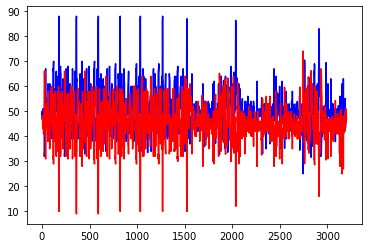

In [34]:
plt.plot(grouped.index, grouped['Biden'], color='blue')
plt.plot(grouped.index, grouped['Trump'], color='red')

In [35]:
# Plot the Difference

# New df -> grouped by date - Mean seats by Biden and Trump
diff_by_date = grouped.groupby('start_date')['Biden','Trump'].mean().reset_index()

# Calculate Difference (seats Biden - seats Trump)
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']

diff_by_date

/tmp/ipykernel_61232/1332072137.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diff_by_date = grouped.groupby('start_date')['Biden','Trump'].mean().reset_index()


,start_date,Biden,Trump,difference
0,2020-08-01,50.142381,47.676381,2.466000
1,2020-08-02,48.800000,47.000000,1.800000
2,2020-08-03,49.500000,43.500000,6.000000
3,2020-08-04,47.916667,44.416667,3.500000
4,2020-08-05,47.661667,43.793333,3.868333
...,...,...,...,...
73,2020-10-14,50.866667,44.766667,6.100000
74,2020-10-15,48.800000,46.700000,2.100000
75,2020-10-16,47.100000,41.900000,5.200000
76,2020-10-17,47.000000,48.400000,-1.400000


In [37]:
# Visualize the Difference with plotly

fig = px.line(diff_by_date, x='start_date', y='difference', title='Biden vs Trump Differnce')
fig.show()

# Tidying up our Data

In [38]:
# Adjust columns
polls = grouped[['state','pollster','end_date','Biden','Trump','Seats']]
polls.head()

,state,pollster,end_date,Biden,Trump,Seats
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20
5,Georgia,Emerson College,2020-10-19,47.0,48.4,16
7,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20
9,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20


# We add Centers and Standard Deviations to our Averages Polling Data

Creating a stack with Trump Supporters on the top, undecides in-between and Biden Supporters in the bottom.

In [44]:
# Add Centers
def getCenter(row):
  ''' Example Calculation
  Biden is 48, Trump is 47
  48 + (100-47-48)/2 = 48 + 5/2 = 50.5
  '''
  return row['Biden'] + (100 - row['Trump'] - row['Biden']) / 2

# Add Deviation
def getDeviation(row):
  # Sort of a guesstimate for STD
  return (abs(row['Trump'] - row['Center']) / 2) + 3

polls['Center'] = polls.apply(getCenter, axis=1)
polls['StdDev'] = polls.apply(getDeviation, axis=1)
polls

/tmp/ipykernel_61232/839263227.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_61232/839263227.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,pollster,end_date,Biden,Trump,Seats,Center,StdDev
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18,50.5,4.75
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20,51.5,5.25
5,Georgia,Emerson College,2020-10-19,47.0,48.4,16,49.3,3.45
7,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,6.50
9,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,6.50
...,...,...,...,...,...,...,...,...
3193,Arizona,OH Predictive Insights,2020-08-04,49.0,45.0,11,52.0,6.50
3195,Arizona,OnMessage Inc.,2020-08-04,48.0,51.0,11,48.5,4.25
3197,Florida,OnMessage Inc.,2020-08-04,49.0,49.0,29,50.0,3.50
3199,Pennsylvania,OnMessage Inc.,2020-08-04,50.0,46.0,20,52.0,6.00


# Now we're going to average all polls

This isn't the best method as it disregards any weighting to better polls and assumes all area equal. In a more advanced study we can use metrics like fte_grade, sample_size and methodology to weight polls.

In [45]:
polls_state_summary = polls.groupby('state').mean().reset_index()
polls_state_summary

,state,Biden,Trump,Seats,Center,StdDev
0,Alabama,39.769048,57.161429,9.0,41.303810,10.928810
1,Alaska,44.020000,52.478636,3.0,45.770682,6.558523
2,Arizona,49.248514,45.155946,11.0,52.046284,6.552061
3,Arkansas,38.753684,58.801579,6.0,39.976053,12.412763
4,California,62.081923,33.621154,55.0,64.230385,18.304615
5,Colorado,55.022903,40.454194,9.0,57.284355,11.415081
6,Connecticut,62.420000,34.561111,7.0,63.929444,17.684167
7,Delaware,63.388500,33.953500,3.0,64.717500,18.382000
8,District of Columbia,86.283889,11.117222,3.0,87.583333,41.233056
9,Florida,48.740263,46.046842,29.0,51.346711,5.706118


# Simulation Time!

We're going to generate a random number from the distribution.
- If it's above 50, we'll say Biden won the state.
- If it's below 50, we'll say Trump won the state.

If Biden wins the state, he gets all the seats in the state, else he gets nothing.

This will give us a nice little series with the numbers representing the electoral seats he won from each state.

The output table below shows for each state the number of seats Biden won. The column represents the results of one simulation.

In [52]:
def runElectionSimulation(times, polls):
  # Create a blank DataFrame to hold our results
  result_frame = pd.DataFrame()

  def getSeats(row):
    # Using the normal distribution function, we input the mean (center) and the stddev
    # If the result is >50, Biden wins
    result = normal(row['Center'], row['StdDev'])
    return row['Seats'] if result > 50 else 0
  
  for i in range(times):
    result_frame[i] = polls.apply(getSeats, axis=1)
  
  return result_frame

# Given an example of the output
res = runElectionSimulation(10, polls_state_summary)
res.loc['Total',:] = res.sum(axis=0)

# Adding state names to result DataFrame
res = pd.concat([polls_state_summary['state'], res], axis=1, sort=False)

res

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0
1,Alaska,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,11.0,0.0,0.0,0.0,0.0,11.0,11.0,0.0,11.0,11.0
3,Arkansas,6.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
4,California,55.0,55.0,55.0,55.0,55.0,55.0,0.0,55.0,55.0,55.0
5,Colorado,0.0,0.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0
6,Connecticut,7.0,0.0,0.0,7.0,0.0,7.0,0.0,7.0,7.0,7.0
7,Delaware,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0
8,District of Columbia,3.0,3.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0
9,Florida,29.0,29.0,0.0,29.0,0.0,0.0,29.0,0.0,0.0,29.0


# Let's analyze the above simulated reults on a state level

In [53]:
# Convert values from float to int
summary = pd.DataFrame((res == 0).astype(int).sum(axis=1))

# Add back state to the leftmost column
res_summary = pd.concat([polls_state_summary['state'], summary], axis=1, sort=False)

# Renaming columns
res_summary.columns = ['state','trump_wins']

# Get a win percentage for Trump
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / 10) * 100

res_summary

,state,trump_wins,percent_trump_wins
0,Alabama,8,80.0
1,Alaska,8,80.0
2,Arizona,5,50.0
3,Arkansas,7,70.0
4,California,1,10.0
5,Colorado,3,30.0
6,Connecticut,4,40.0
7,Delaware,1,10.0
8,District of Columbia,3,30.0
9,Florida,5,50.0


Let's get the sum of Biden's wins across the simulations

In [54]:
res.loc['Total'][res.loc['Total'] > 270.0].count()

9

## THIS IS WHERE THE SIMULATION HAPPENS (10K)

In [55]:
number_of_simulations = 10000

election_results = runElectionSimulation(number_of_simulations, polls_state_summary)
election_results.loc['Total',:] = election_results.sum(axis=0)

biden_wins = election_results.loc['Total'][election_results.loc['Total'] > 270.0].count()

# Print output
print(f'Joe Biden wins {biden_wins} times out of {number_of_simulations} simulations')

/tmp/ipykernel_61232/3530682587.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Joe Biden wins 7968 times out of 10000 simulations


# Let's now summarize the simulation result per state.

In [63]:
summary = pd.DataFrame((election_results == 0).astype(int).sum(axis=1))

res_summary = pd.concat([polls_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state','trump_wins']
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / number_of_simulations) * 100
res_summary['percent_biden_wins'] = 100 - res_summary['percent_trump_wins']
res_summary = res_summary.dropna()
res_summary

,state,trump_wins,percent_trump_wins,percent_biden_wins
0,Alabama,7881,78.81,21.19
1,Alaska,7415,74.15,25.85
2,Arizona,3875,38.75,61.25
3,Arkansas,7907,79.07,20.93
4,California,2175,21.75,78.25
5,Colorado,2597,25.97,74.03
6,Connecticut,2189,21.89,78.11
7,Delaware,2083,20.83,79.17
8,District of Columbia,1823,18.23,81.77
9,Florida,4055,40.55,59.45


In [59]:
# Top 50 states for highest chances to win for Biden
res_summary.sort_values('percent_biden_wins', ascending=False).head(50)

,state,trump_wins,percent_trump_wins,percent_biden_wins
8,District of Columbia,1823,18.23,81.77
21,Massachusetts,1956,19.56,80.44
45,Vermont,1978,19.78,80.22
32,New York,2025,20.25,79.75
20,Maryland,2064,20.64,79.36
11,Hawaii,2074,20.74,79.26
7,Delaware,2083,20.83,79.17
39,Rhode Island,2107,21.07,78.93
4,California,2175,21.75,78.25
6,Connecticut,2189,21.89,78.11


In [64]:
# Add Seats they win to the dataset
def getSeats(row):
  return states[row['state']]

res_summary['seats'] = res_summary.apply(getSeats, axis=1)

# Since it's all or none, we can multiply seats by 1 and 0
res_summary['seats_trump_wins'] = res_summary['percent_trump_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_trump_wins'] = res_summary['seats_trump_wins'] * res_summary['seats']

res_summary['seats_biden_wins'] = res_summary['percent_biden_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_biden_wins'] = res_summary['seats_biden_wins'] * res_summary['seats']

seats_trump_wins = res_summary['seats_trump_wins'].sum()
seats_biden_wins = res_summary['seats_biden_wins'].sum()

print(f'Trump Wins: {seats_trump_wins} seats')
print(f'Biden Wins: {seats_biden_wins} seats')
res_summary

Trump Wins: 188 seats
Biden Wins: 350 seats


,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,Alabama,7881,78.81,21.19,9,9,0
1,Alaska,7415,74.15,25.85,3,3,0
2,Arizona,3875,38.75,61.25,11,0,11
3,Arkansas,7907,79.07,20.93,6,6,0
4,California,2175,21.75,78.25,55,0,55
5,Colorado,2597,25.97,74.03,9,0,9
6,Connecticut,2189,21.89,78.11,7,0,7
7,Delaware,2083,20.83,79.17,3,0,3
8,District of Columbia,1823,18.23,81.77,3,0,3
9,Florida,4055,40.55,59.45,29,0,29


# Creating a US Election Map

In [65]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

res_summary = res_summary.replace({'state': us_state_abbrev})
res_summary.head()

,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,AL,7881,78.81,21.19,9,9,0
1,AK,7415,74.15,25.85,3,3,0
2,AZ,3875,38.75,61.25,11,0,11
3,AR,7907,79.07,20.93,6,6,0
4,CA,2175,21.75,78.25,55,0,55


In [84]:
fig = go.Figure(data=go.Choropleth(
  locations = res_summary['state'], # Spacial co-ordinates
  z = res_summary['percent_trump_wins'].astype(float), # Data has to be color-coded
  locationmode = 'USA-states', # Set of locations match entries in 'locations'
  colorscale = 'Bluered',
  colorbar_title = 'Trump',
))

title = f'{number_of_simulations} Simulations of the 2020 US Election show Biden winning {seats_biden_wins} and Trump winning {seats_trump_wins} seats.'
fig.update_layout(
  title_text = title,
  geo_scope = 'usa',
)

fig.show()